In [2]:
import ugradio
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib notebook

No module named 'rtlsdr'


In [3]:
f = fits.open('test.fits,')
dict(f[0].header)

{'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'NSPEC': 100,
 'BOFFILE': 'spec_ds8_8192.bof',
 'MODE': 'spec',
 'FPGA': 192000000.0,
 'IADC': 768000000.0,
 'DOWNSAMP': 8,
 'SAMPRATE': 24000000.0,
 'BW': 12000000.0,
 'NCHAN': 8192,
 'RES': 1464.84375,
 'FFTSHIFT': 16383,
 'ACCLEN': 134217728,
 'INTTIME': 0.6990506666666667,
 'SCALE': 0,
 'L': 120.0,
 'B': 0.0,
 'RA': 6.764064252275513,
 'DEC': 62.84893873114823,
 'JD': 2459682.329074074,
 'UTC': '2022/04/12 19:53:52',
 'TIME': 1649793232.726299}

In [4]:
f_0_list = []
f_1_list = []
for i in range(1,101):
    f_0 = f[i].data['auto0_real']
    f_0_list.append(f_0)
    f_1 = f[i].data['auto1_real']
    f_1_list.append(f_1)

In [5]:
f_0_mean = np.mean(f_0_list, axis=0)
f_1_mean = np.mean(f_1_list, axis=0)

<IPython.core.display.Javascript object>


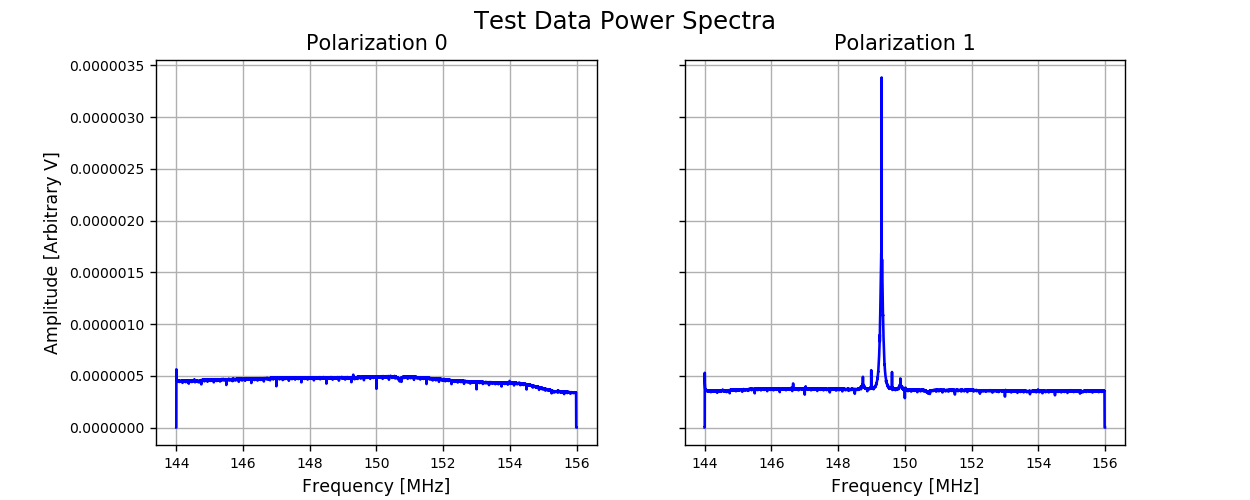

Text(0.5, 0.98, 'Test Data Power Spectra')

In [32]:
freq = np.linspace(144,156,8192)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,4))

ax1.plot(freq, f_0_mean, color='b')
ax1.set_title('Polarization 0', fontsize=12)
ax1.set_xlabel('Frequency [MHz]', fontsize=10)
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.set_ylabel('Amplitude [Arbitrary V]', fontsize=10)
ax1.grid()

ax2.plot(freq, f_1_mean, color='b')
ax2.set_title('Polarization 1', fontsize=12)
ax2.set_xlabel('Frequency [MHz]')
ax2.xaxis.set_tick_params(labelsize=8)
ax2.grid()

fig.suptitle('Test Data Power Spectra', fontsize=14)